In [2]:
import pickle
from pforest.master import master
m=master(dsetname='testCS213')
m.reset()
m.train()
with open('train/out_tree.pic', 'wb') as pickleFile:
    pickle.dump(m.root, pickleFile, pickle.HIGHEST_PROTOCOL)


master>>init() dsetname: testCS213
master>> create dview
master>> init engine
Found pforest
debug:master:__init__: ['train/dataset00.pic', 'train/dataset01.pic', 'train/dataset02.pic', 'train/dataset03.pic']
master>> init local variables
master>>reset()
master>>reset() H: 2.9537
master>>reset() Q: 03060
master::train() node20*-
master::train() node19R-
master::train() node18R-
master::train() node17R-
master::train() node16R-
master::train() node15R-
master::train() node14R-
master::train() node13RG
master::train() node13L-
master::train() node12R-
master::train() node11R-
master::train() node10RG
master::train() node10LG
master::train() node11L-
master::train() node10R-
master::train() node9RQ
master::train() node9L-
master::train() node8RG
master::train() node8LG
master::train() node10LG
master::train() node12L-
master::train() node11RG
master::train() node11L-
master::train() node10RQ
master::train() node10LG
master::train() node14LG
master::train() node15L-
master::train() node14R-

In [3]:
from pforest.dataset import dataset
from pforest.tree import tree
with open('train/out_tree.pic', 'rb') as pickleFile:
    root = pickle.load(pickleFile)
#init the test tree
t=tree()
t.settree(root)
t.show()

Found pforest
*- 20 H:2.954e+00,Q:003060 tau:7.0 theta:[ 22.]
L- 19 H:2.531e+00,Q:000492 tau:9.0 theta:[ 35.]
L- 18 H:2.195e+00,Q:000396 tau:6.0 theta:[ 22.]
L- 17 H:2.430e+00,Q:000064 tau:9.0 theta:[ 154.]
L- 16 H:1.664e+00,Q:000028 tau:7.0 theta:[ 201.]
LG 15 H:1.371e+00,Q:000020 (cl,P):(007,0.60) (011,0.20) (009,0.20)
RG 15 H:1.000e+00,Q:000008 (cl,P):(007,0.50) (005,0.50) (013,0.00)
R- 16 H:2.113e+00,Q:000036 tau:5.0 theta:[ 125.]
LG 15 H:9.183e-01,Q:000012 (cl,P):(006,0.67) (005,0.33) (013,0.00)
R- 15 H:1.792e+00,Q:000024 tau:10.0 theta:[ 32.]
L- 14 H:1.371e+00,Q:000020 tau:11.0 theta:[ 182.]
L- 13 H:1.000e+00,Q:000008 tau:3.0 theta:[ 97.]
LQ 12 H:1.925e-35,Q:000004 (cl,P):(008,1.00) (013,0.00) (012,0.00)
RQ 12 H:1.925e-35,Q:000004 (cl,P):(007,1.00) (013,0.00) (012,0.00)
R- 13 H:9.183e-01,Q:000012 tau:8.0 theta:[ 98.]
LQ 12 H:1.925e-35,Q:000004 (cl,P):(009,1.00) (013,0.00) (012,0.00)
RG 12 H:9.704e-36,Q:000008 (cl,P):(008,1.00) (013,0.00) (012,0.00)
RQ 14 H:1.925e-35,Q:000004 (cl,

In [5]:
import numpy as np
u=np.zeros(203)
Prob=t.classify(u)

In [6]:
Prob


array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.6,  0. ,  0.2,  0. ,
        0.2,  0. ,  0. ])

In [7]:
predictedGrade=np.argmax(Prob)

In [8]:
Grade=['A', 'B+', 'B', 'C+', 'C' , 'D+' , 'D' , 'F' , 'W' , 'S' , 'S#' , 'U' , 'U#']
Grade[predictedGrade]

'F'

In [9]:
import pandas as pd
df_file = pd.read_excel('../src/transform.xlsx')
df_file = df_file.fillna(0)
df_file = df_file.replace(['A', 'B+', 'B', 'C+', 'C' , 'D+' , 'D' , 'F' , 'W' , 'S' , 'S#' , 'U' , 'U#'], 
                     [13, 12, 11, 10 , 9, 8, 7, 6, 5, 4, 3, 2, 1])
df_file_new = df_file.drop(['0STUDENTID','1ACADYEAR','2SEMESTER','3COURSEID','4RESULT'],1)



In [41]:
df_file16 = df_file_new[415:416]
import numpy as np
u = df_file16.as_matrix()[0]
Prob=t.classify(u)

In [42]:
Prob

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [43]:
predictedGrade=np.argmax(Prob)
print predictedGrade

11


In [44]:
Grade=['A', 'B+', 'B', 'C+', 'C' , 'D+' , 'D' , 'F' , 'W' , 'S' , 'S#' , 'U' , 'U#','na']
Grade[::-1][predictedGrade]

'B'

In [35]:
df_file[16:17]

,0STUDENTID,1ACADYEAR,2SEMESTER,3COURSEID,4RESULT,AN201,AS171,AS177,AS178,AT207,...,TU113,TU115,TU116,TU120,TU121,TU122,TU130,TU153,TU154,TU156
16,316644,2553,1,CS213,9,0,0,0,0,0,...,0,0,0,8,0,12,11,0,7,0


In [36]:
df_file[123:124]

,0STUDENTID,1ACADYEAR,2SEMESTER,3COURSEID,4RESULT,AN201,AS171,AS177,AS178,AT207,...,TU113,TU115,TU116,TU120,TU121,TU122,TU130,TU153,TU154,TU156
123,321848,2553,1,CS213,10,0,0,0,0,0,...,0,0,0,8,0,0,0,0,13,0


In [40]:
df_file[415:416]

,0STUDENTID,1ACADYEAR,2SEMESTER,3COURSEID,4RESULT,AN201,AS171,AS177,AS178,AT207,...,TU113,TU115,TU116,TU120,TU121,TU122,TU130,TU153,TU154,TU156
415,329171,2554,2,CS213,11,0,0,0,0,0,...,0,0,0,10,0,0,11,0,8,0


In [37]:
I

array([[ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0, 13,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       ..., 
       [ 0,  0,  0, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [38]:
with open('train/dataset00.pic', 'rb') as pickleFile:
     data = pickle.load(pickleFile)

In [39]:
I=data[-2];L=data[-3]

In [19]:
ls train

 Volume in drive D is DATA
 Volume Serial Number is E617-8A3A

 Directory of D:\project\forcast\src\train

02/12/2016  03:00 PM    <DIR>          .
02/12/2016  03:00 PM    <DIR>          ..
02/26/2016  11:12 AM         1,248,695 dataset00.pic
02/12/2016  02:38 PM         1,248,695 dataset01.pic
02/12/2016  02:38 PM         1,248,695 dataset02.pic
02/12/2016  02:38 PM         1,248,695 dataset03.pic
03/02/2016  03:43 PM           142,375 out_tree.pic
               5 File(s)      5,137,155 bytes
               2 Dir(s)  259,089,788,928 bytes free


In [20]:
I

array([[ 0,  0,  0, ...,  0,  7,  0],
       [ 0,  0,  0, ...,  0, 13,  0],
       [ 0,  0,  0, ...,  0, 10,  0],
       ..., 
       [ 0,  0,  0, ...,  0, 10,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0]], dtype=int64)

In [21]:
L

array([ 9, 10,  8, 10,  9,  5,  7,  9,  6,  6,  8, 11,  7, 11,  9,  8, 12,
        9,  6, 11,  9,  5,  8, 11, 13, 11,  7, 12,  7, 12, 12, 12,  8,  9,
        7,  7,  9,  9,  7, 11, 13, 13,  9,  9, 13, 10, 10, 10,  8, 11,  8,
       13,  9,  9,  9, 13, 11, 13,  8, 10,  7,  8,  9, 12, 12, 13,  9, 10,
        8,  9,  8, 12,  5,  9, 10, 12, 11, 10, 11,  9, 10,  7,  8,  9,  9,
        6, 10,  7, 10,  9, 11,  5,  7,  8, 10, 10, 11,  5,  7,  9,  8,  6,
       10,  8, 10,  8,  9,  8,  6,  9,  8, 11,  5,  7,  7,  8,  8, 11,  9,
        9, 11,  9, 10,  8, 10,  7,  5,  9,  9,  9,  5,  7,  8,  8, 10,  8,
       10,  8, 11,  5,  9, 10,  8, 10,  9,  9,  7, 10,  9, 10,  7, 11,  9,
        9,  8,  6, 10,  6,  9,  9,  5,  8,  9,  6, 12,  8, 11,  9,  5,  7,
        9,  8,  9, 10,  9,  9,  9,  7, 10, 13,  9, 12,  9, 10, 10, 11,  5,
        8, 11,  9, 12, 12,  9, 11, 12,  9,  8, 11,  8,  9,  7, 10, 12, 13,
       13, 13,  9,  9,  9,  6,  8,  9,  8, 12,  5,  5,  6,  8, 11,  9, 13,
       11,  8, 11, 10, 10

In [22]:
i=0
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predictedGrade=np.argmax(Prob)
    print "actual grade:%d predicted grade:%d"%(L[i],predictedGrade)

actual grade:9 predicted grade:9
actual grade:10 predicted grade:9
actual grade:8 predicted grade:7
actual grade:10 predicted grade:10
actual grade:9 predicted grade:9
actual grade:5 predicted grade:5
actual grade:7 predicted grade:5
actual grade:9 predicted grade:9
actual grade:6 predicted grade:6
actual grade:6 predicted grade:6
actual grade:8 predicted grade:9
actual grade:11 predicted grade:11
actual grade:7 predicted grade:7
actual grade:11 predicted grade:11
actual grade:9 predicted grade:9
actual grade:8 predicted grade:8
actual grade:12 predicted grade:11
actual grade:9 predicted grade:8
actual grade:6 predicted grade:6
actual grade:11 predicted grade:11
actual grade:9 predicted grade:9
actual grade:5 predicted grade:7
actual grade:8 predicted grade:9
actual grade:11 predicted grade:11
actual grade:13 predicted grade:13
actual grade:11 predicted grade:7
actual grade:7 predicted grade:7
actual grade:12 predicted grade:12
actual grade:7 predicted grade:9
actual grade:12 predicted

In [23]:
I.shape

(765L, 203L)

In [24]:
i=0
actual=np.array(L)
predict=np.zeros(len(L))
for i in xrange(len(L)):
    Prob=t.classify(I[i])
    predict[i]=np.argmax(Prob)
   
    print "actual grade:%d predicted grade:%d"%(actual[i],predict[i])

actual grade:9 predicted grade:9
actual grade:10 predicted grade:9
actual grade:8 predicted grade:7
actual grade:10 predicted grade:10
actual grade:9 predicted grade:9
actual grade:5 predicted grade:5
actual grade:7 predicted grade:5
actual grade:9 predicted grade:9
actual grade:6 predicted grade:6
actual grade:6 predicted grade:6
actual grade:8 predicted grade:9
actual grade:11 predicted grade:11
actual grade:7 predicted grade:7
actual grade:11 predicted grade:11
actual grade:9 predicted grade:9
actual grade:8 predicted grade:8
actual grade:12 predicted grade:11
actual grade:9 predicted grade:8
actual grade:6 predicted grade:6
actual grade:11 predicted grade:11
actual grade:9 predicted grade:9
actual grade:5 predicted grade:7
actual grade:8 predicted grade:9
actual grade:11 predicted grade:11
actual grade:13 predicted grade:13
actual grade:11 predicted grade:7
actual grade:7 predicted grade:7
actual grade:12 predicted grade:12
actual grade:7 predicted grade:9
actual grade:12 predicted

In [25]:
np.sqrt(np.sum((actual-predict)**2)/len(L))

1.2366938848016846

Populating the interactive namespace from numpy and matplotlib


(array([   1.,    0.,    4.,    0.,    0.,   13.,    0.,   23.,    0.,
           0.,   37.,    0.,  542.,    0.,    0.,   68.,    0.,   34.,
           0.,    0.,   25.,    0.,   10.,    0.,    0.,    5.,    0.,
           2.,    0.,    1.]),
 array([-5. , -4.6, -4.2, -3.8, -3.4, -3. , -2.6, -2.2, -1.8, -1.4, -1. ,
        -0.6, -0.2,  0.2,  0.6,  1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,
         3.8,  4.2,  4.6,  5. ,  5.4,  5.8,  6.2,  6.6,  7. ]),
 <a list of 30 Patch objects>)

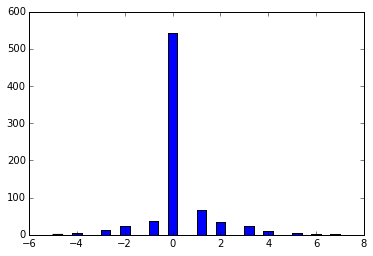

In [26]:
from matplotlib import pyplot as plt
%pylab inline
plt.hist(actual-predict,30)

In [104]:
actual[0]-predict[0]

0